In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint, uniform as sp_uniform

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

In [3]:
file_path = './data/AIML Dataset.csv'
os.path.exists(file_path)
df = pd.read_csv(file_path)
print("\n📌 Shape del dataset:", df.shape)
display(df.head())


📌 Shape del dataset: (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
print("\n🔎 Tipos de datos y conteo de valores nulos:")
df.info()
print("\n🔍 Conteo de valores nulos por columna:")
print(df.isnull().sum())

print("\n📊 Estadísticas descriptivas:")
display(df.describe(include='all'))

print("\n📌 Columnas del dataset:")
print(df.columns.tolist())


🔎 Tipos de datos y conteo de valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB

🔍 Conteo de valores nulos por columna:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

📊 Estadísticas descriptivas:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00



📌 Columnas del dataset:
['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [5]:
target_cols = [col for col in df.columns if 'fraud' in col.lower() or 'target' in col.lower()]
if target_cols:
    for target in target_cols:
        print(f"\n📉 Distribución de clases para '{target}':")
        print(df[target].value_counts(normalize=True))


📉 Distribución de clases para 'isFraud':
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

📉 Distribución de clases para 'isFlaggedFraud':
isFlaggedFraud
0    0.999997
1    0.000003
Name: proportion, dtype: float64


## 📌 Observaciones Iniciales del Dataset

### ✅ Calidad de los datos
- No se detectaron valores nulos en ninguna de las columnas.  
- El dataset cuenta con **6,362,620 registros** y **11 columnas**.

### 🧩 Tipos de variables
- **Numéricas continuas:** `amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, `newbalanceDest`
- **Categóricas:** `type` (5 categorías distintas), `nameOrig`, `nameDest` (identificadores únicos)
- **Binarias (objetivo y flag):** `isFraud`, `isFlaggedFraud`

### 🔎 Hallazgos preliminares
- La variable **`isFraud`** tiene una distribución altamente desbalanceada (~0.13% de fraudes).
- La variable **`isFlaggedFraud`** está casi vacía (~0.00025%), probablemente **no útil para el modelado**.
- Las columnas **`nameOrig` y `nameDest`** parecen identificadores únicos → posiblemente irrelevantes como features.
- Variables como `oldbalanceOrg`, `newbalanceOrig` y sus equivalentes de destino tienen **valores cero frecuentes**, lo que podría indicar:
  - cuentas vacías,
  - comportamiento fraudulento,
  - o reglas de negocio específicas.

### ⏱️ Componente temporal
- La variable `step` indica progresión temporal en intervalos discretos (posiblemente por hora o día). Puede usarse para análisis de evolución o patrones en el tiempo.



C:\Users\MIKE PC\AppData\Local\Temp\ipykernel_20976\4201376930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_by_type, x='type', y='isFraud', palette='Reds_r')


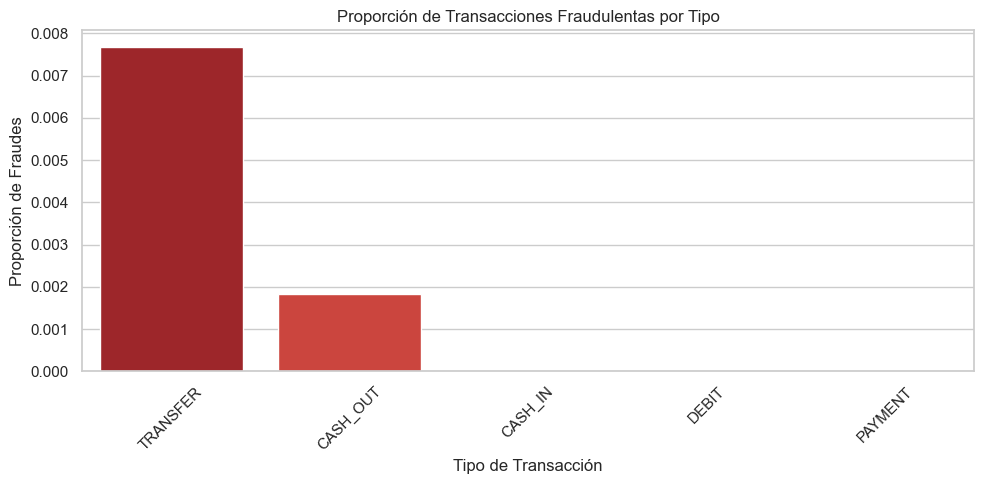

In [6]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=fraud_by_type, x='type', y='isFraud', palette='Reds_r')
plt.title('Proporción de Transacciones Fraudulentas por Tipo')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Proporción de Fraudes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

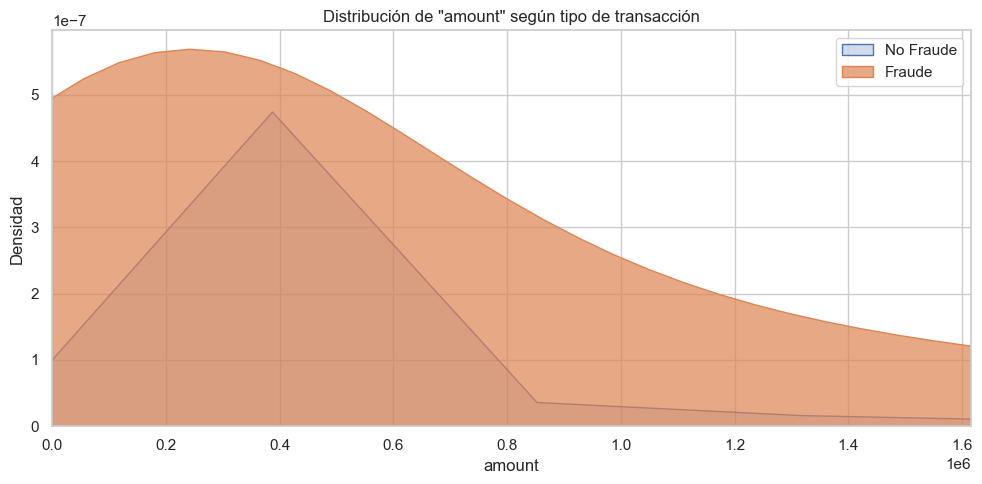

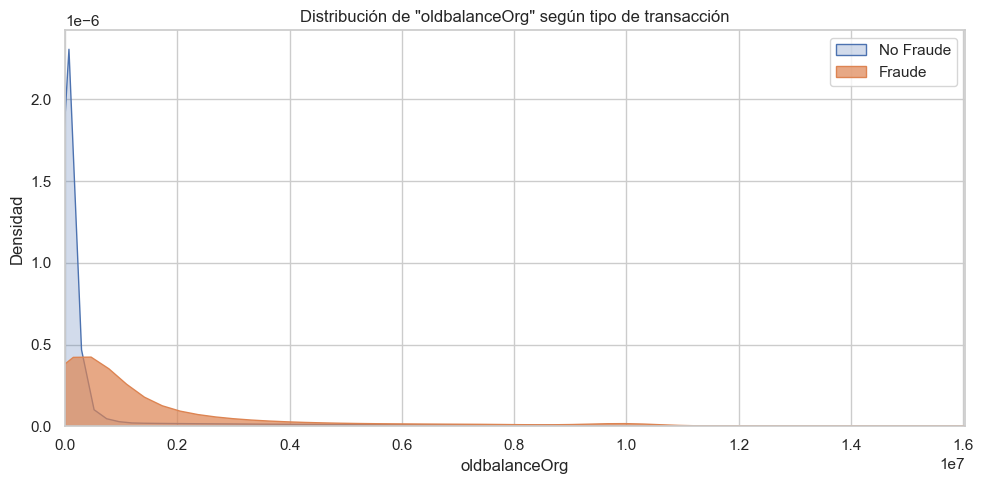

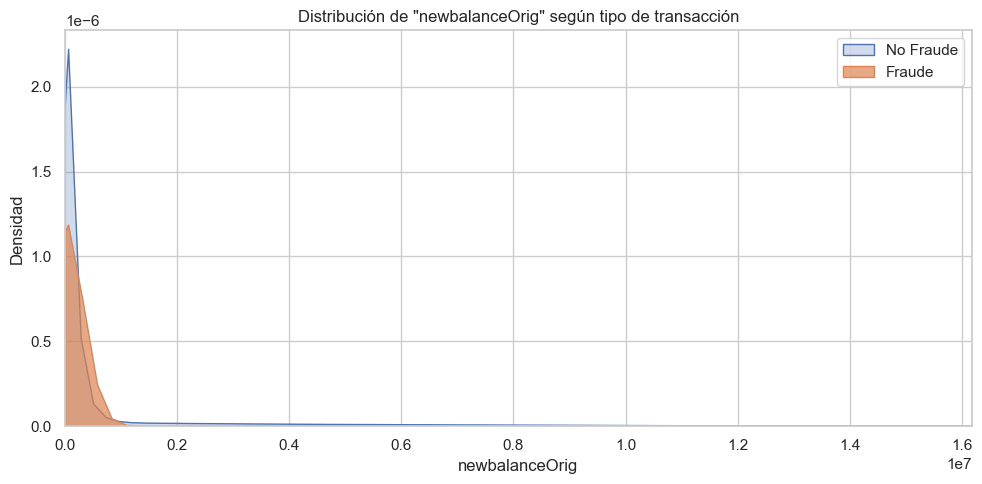

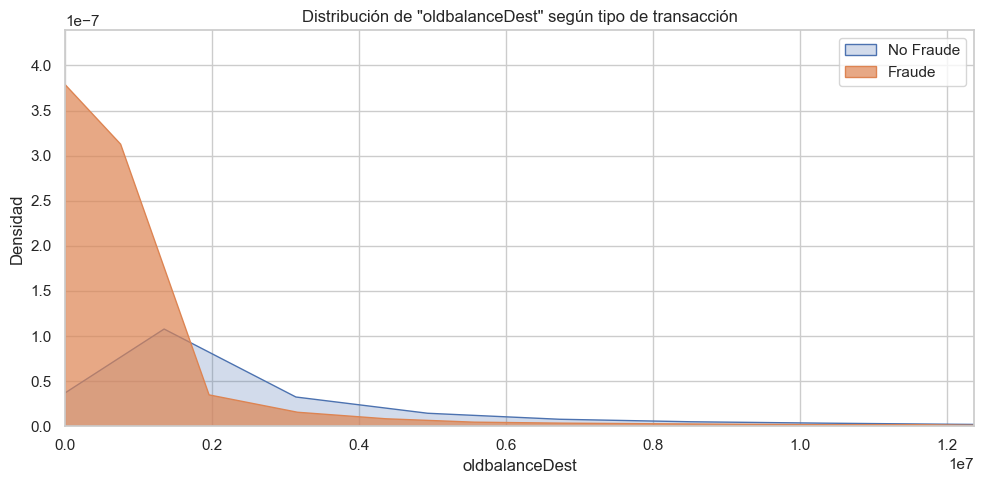

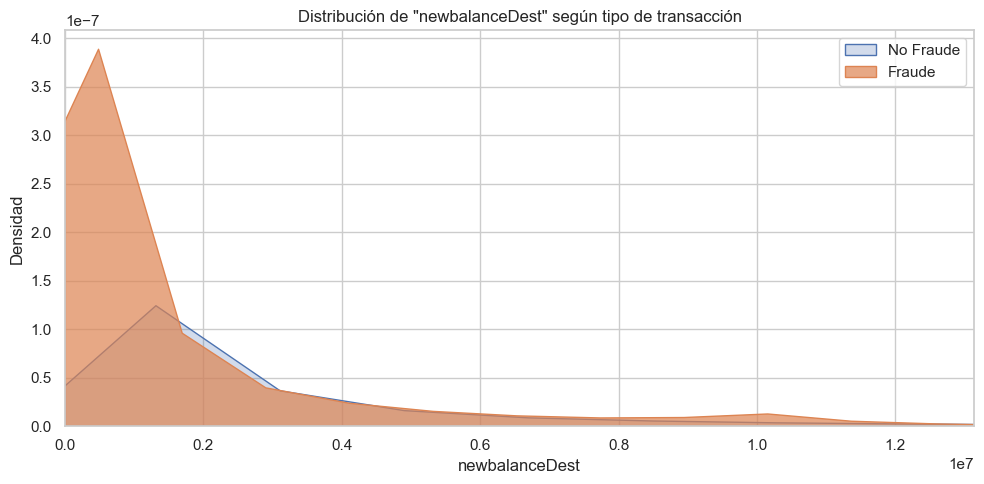

In [7]:
variables_numericas = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for col in variables_numericas:
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=df[df['isFraud'] == 0], x=col, label='No Fraude', fill=True)
    sns.kdeplot(data=df[df['isFraud'] == 1], x=col, label='Fraude', fill=True, alpha=0.7)
    plt.title(f'Distribución de "{col}" según tipo de transacción')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend()
    plt.xlim(0, df[col].quantile(0.99))
    plt.tight_layout()
    plt.show()

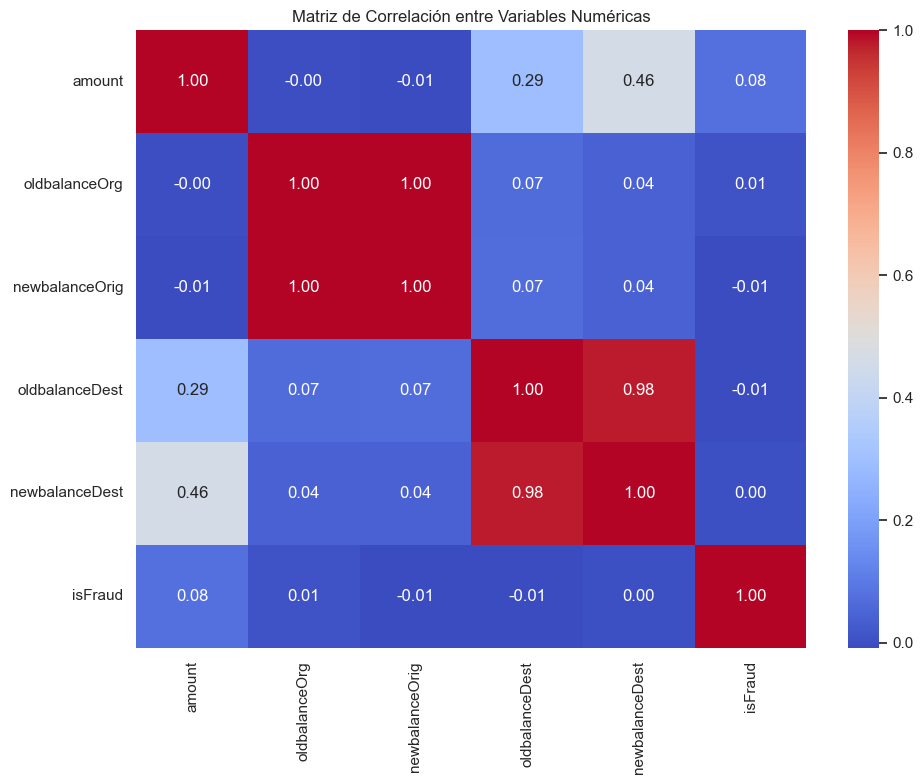

In [8]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[variables_numericas + ['isFraud']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()


In [9]:
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type']
df_model = df[features + ['isFraud']].copy()

# Codificación de variable categórica
df_model = pd.get_dummies(df_model, columns=['type'], drop_first=True)

# Separación en X y y
X = df_model.drop('isFraud', axis=1)
y = df_model['isFraud']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar SMOTE para balancear clases
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

print(f"\n Conjunto de entrenamiento balanceado con SMOTE: {X_res.shape}, {y_res.shape}")



 Conjunto de entrenamiento balanceado con SMOTE: (10167052, 9), (10167052,)


In [10]:
modelos = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

resultados = {}
X_train_sample, y_train_sample = resample(X_res, y_res, n_samples=1_000_000, random_state=42)

In [11]:
for nombre, modelo in modelos.items():
    print(f"\n Entrenando modelo: {nombre}")
    modelo.fit(X_train_sample, y_train_sample)
    y_pred = modelo.predict(X_test_scaled)
    y_prob = modelo.predict_proba(X_test_scaled)[:, 1] if hasattr(modelo, 'predict_proba') else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    print(f"\n Resultados para {nombre}:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    if auc is not None:
        print(f"ROC AUC:   {auc:.4f}")

    resultados[nombre] = {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "auc": auc}



 Entrenando modelo: XGBoost


d:\anaconda\envs\rusty_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:16:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Resultados para XGBoost:
Accuracy:  0.9968
Precision: 0.2887
Recall:    0.9957
F1-score:  0.4477
ROC AUC:   0.9994

 Entrenando modelo: Random Forest

 Resultados para Random Forest:
Accuracy:  0.9979
Precision: 0.3825
Recall:    0.9909
F1-score:  0.5520
ROC AUC:   0.9995

 Entrenando modelo: Logistic Regression

 Resultados para Logistic Regression:
Accuracy:  0.9445
Precision: 0.0217
Recall:    0.9537
F1-score:  0.0425
ROC AUC:   0.9902


In [14]:
best_rf = RandomForestClassifier(
    n_estimators=87,
    max_depth=26,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=9,
    random_state=42,
    n_jobs=-1
)


In [15]:
best_rf.fit(X_res, y_res)

y_pred = best_rf.predict(X_test_scaled)
y_prob = best_rf.predict_proba(X_test_scaled)[:, 1]


In [17]:
print(" Resultados del Random Forest optimizado:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_prob):.4f}")

 Resultados del Random Forest optimizado:
Accuracy:  0.9990
Precision: 0.5707
Recall:    0.9757
F1-score:  0.7201
ROC AUC:   0.9991
